# 詳解 確率ロボティクス 2.4 条件付き確率

sensor_data_600.txt（ロボットから600[mm]離してlidar, irのセンサ値を取得）を用いる．

/Users/hide/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/hide/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['ipaexg'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


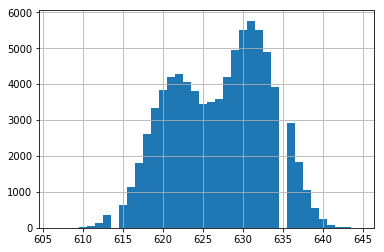

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

data  = pd.read_csv("sensor_data_600.txt", delimiter=" ", 
                    header=None, names = ("date","time","ir","lidar"))

data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),align='left')
plt.show()

二つの値が欠けるのは，センサ内部でディジタル処理をする様々なセンサで起こりうること．

- マルチモーダル（多峰性）：ピークが2個以上ある分布

c.f. モードが二つの分布は特にバイモーダルと呼ばれる．
モード（最頻値：統計用語）

全センサ値を時系列順に描画する（横軸：取得順にセンサ値につけた番号，縦軸：センサ値）

/Users/hide/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['ipaexg'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


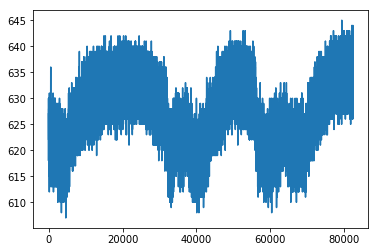

In [2]:
data.lidar.plot()
plt.show()

/Users/hide/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['ipaexg'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


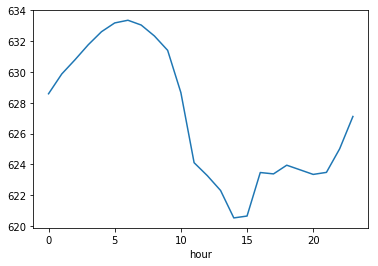

In [3]:
data["hour"] = [e//10000 for e in data.time]  #hourly_mean,Note that "//" is not "/"#
d = data.groupby("hour")
d.lidar.mean().plot()
plt.show()

1行目：データフレームに hour という列を追加．値は時刻（時分秒の6桁）を10000で割ったもの（時の部分だけを残している）．
//は小数点以下を切り捨てる割り算．

2行目：hour 列の値ごとに各レコードをグループ分けした新たなデータフレーム d を生成している．

/Users/hide/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['ipaexg'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


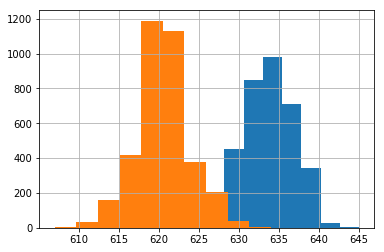

In [4]:
d.lidar.get_group(6).hist()
d.lidar.get_group(14).hist()
plt.show()

ある変数$x$で条件づけられる別の変数$y$の確率分布は
<div style="text-align: center;">
$P(y|x)$
</div>
と表現される（条件付き確率）．

$P(z|t)$において，時刻$t$が分布を変えている直接の原因を表しているわけではない（条件付き確率は変数間の直接の因果を表すものではない）．

In [5]:
each_hour = {i : d.lidar.get_group(i).value_counts().sort_index() for i in range(24)}
freqs = pd.concat(each_hour, axis = 1)
freqs = freqs.fillna(0)
probs = freqs/len(data)

probs

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000012,0.000000,0.000000
609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000012,0.000000
610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000036,0.000049,0.000000,0.000000,0.000012,0.000012,0.000134,0.000000,0.000000,0.000000
611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000146,0.000122,0.000000,0.000000,0.000000,0.000024,0.000073,0.000146,0.000049,0.000000
612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000219,0.000316,0.000000,0.000036,0.000036,0.000061,0.000255,0.000194,0.000024,0.000012
613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000620,0.000644,0.000024,0.000182,0.000061,0.000219,0.000680,0.000437,0.000109,0.000024
615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001300,0.001045,0.000024,0.000207,0.000267,0.000377,0.000984,0.001021,0.000474,0.000049
616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001956,0.001810,0.000219,0.000595,0.000595,0.001021,0.001725,0.001397,0.000595,0.000085
617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003111,0.002928,0.000510,0.001264,0.000923,0.001640,0.002211,0.002296,0.001021,0.000146


/Users/hide/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/hide/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/hide/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['ipaexg'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


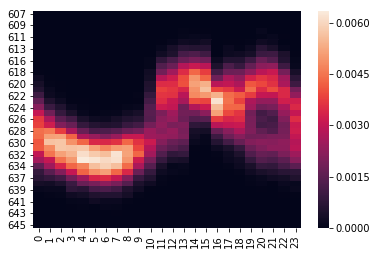

In [6]:
import seaborn as sns

sns.heatmap(probs)
plt.show()

In [ ]:
sns.jointplot(data["hour"], data["lidar"], data, kind = "kde")
plt.show()

/Users/hide/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['ipaexg'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hide/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [ ]:
p_t = pd.DataFrame(probs.sum())
p_t.plot()
p_t.transpose()

In [ ]:
p_t.sum()

In [ ]:
p_z = pd.DataFrame(probs.transpose().sum())
p_z.plot()
p_z.transpose()

In [ ]:
p_z.sum()

In [ ]:
cond_z_t = probs/p_t[0]
cond_z_t

In [ ]:
(cond_z_t[6]).plot.bar(color = "blue", alpha = 0.5)
(cond_z_t[14]).plot.bar(color = "orange", alpha = 0.5)
plt.show()

In [ ]:
cond_t_z = probs.transpose() / probs.transpose().sum()

print("P(z = 630) = ", p_z[0][630])
print("P(t = 13) = ", p_t[0][13])
print("P(t = 13 | z = 630) =", cond_t_z[630][13])
print("Bayes P(z = 630 | t = 13) = ", cond_t_z[630][13] * p_z[0][630] / p_t[0][13])

print("answer P(z = 630 | t = 13) = ", cond_z_t[13][630])

In [ ]:
def bayes_estimation(sensor_value, current_estimation): 
    new_estimation = []
    for i in range(24):
        new_estimation.append(cond_z_t[i][sensor_value]*current_estimation[i])
        
    return new_estimation / sum(new_estimation)

In [ ]:
estimation = bayes_estimation(630, p_t[0])
plt.plot(estimation)

In [ ]:
value_5 = [630, 632, 636]

estimation = p_t[0]
for v in value_5:
    estimation = bayes_estimation(v, estimation)

plt.plot(estimation)

In [ ]:
values_11 = [617, 624, 619]

estimation = p_t[0]
for v in values_11:
    estimation = bayes_estimation(v, estimation)
    
plt.plot(estimation)